# 1.图像读取和保存

In [4]:
import cv2

# 读取的格式为BGR
img = cv2.imread('../example_images/cat.jpg') # ndarray (h,w,c) 

# 以灰度方式读取图像
img2 = cv2.imread('../example_images/cat.jpg', cv2.IMREAD_GRAYSCALE)

In [15]:
# 图像的展示
cv2.imshow('image', img)
# 等待时间,毫秒级,0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 图像的保存
cv2.imwrite('mycat.png', img)

# 2.视频的读取

In [2]:
# 读取视频
import cv2
vc = cv2.VideoCapture('../example_images/test.mp4')

In [3]:
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False

In [4]:
# 逐帧读取图像
while True:
    net, frame = vc.read()
    if frame is None:
        break
    if net:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('gray', gray)
        cv2.waitKey(10)
        
vc.release()
cv2.destroyAllWindows()

# 3.图像基本操作

## 3.1 截取部分区域

In [6]:
# 截取部分区域
import cv2
img = cv2.imread('../example_images/cat.jpg')
cat = img[:200, :200]

cv2.imshow('cat', cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3.2 颜色通道提取和合并

In [9]:
# 颜色通道提取
b,g,r=cv2.split(img)

In [10]:
# 合并通道
img = cv2.merge((b,g,r))

In [11]:
# 只保留r通道
img_copy = img.copy()
img_copy[:, :, 0] = 0
img_copy[:, :, 1] = 0
cv2.imshow('img', img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3.3 边界填充

In [20]:
# 边界填充
import cv2

img = cv2.imread('../example_images/cat.jpg')
img = cv2.resize(img,(100, 200))

top_size, bottom_size, left_size, right_size = 50,50,50,50

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size,left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

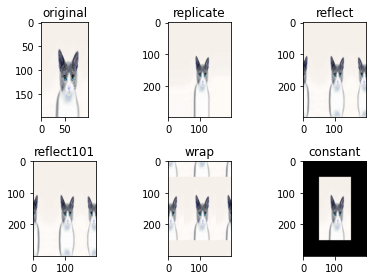

In [30]:
import matplotlib.pyplot as plt

plt.subplot(231),plt.imshow(img,'gray'),plt.title('original')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('replicate')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('reflect')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('reflect101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('wrap')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('constant')

plt.tight_layout()
plt.show()

## 3.4 数值计算


opencv读取数据后，为ndarray类型，元素为uint8，所以一方面符合ndarray的计算准则；另一方面如果大于255，则自动进行处理。

In [45]:
import cv2

img = cv2.imread('../example_images/cat.jpg')
img = cv2.resize(img, (100, 100))

# 大于255的灰度值,对255取余-1操作
img2 = img + 20 
# 大于255的灰度值,直接取255
img3 = cv2.add(img, 20)
print(img[:2, :2, 0], img2[:2, :2, 0], img3[:2, :2, 0])

[[246 246]
 [246 246]] [[10 10]
 [10 10]] [[255 255]
 [255 255]]


## 3.5 改变图像尺寸

In [5]:
import cv2

img = cv2.imread('../example_images/cat.jpg')

# 改变图像尺寸
img2 = cv2.resize(img, (200, 100)) # 指定(w,h)

# 拉伸
img3 = cv2.resize(img, (0, 0), fx=2, fy=3) # w*2,h*3

print(img.shape, img2.shape, img3.shape)

(2016, 2160, 3) (100, 200, 3) (6048, 4320, 3)


## 3.6 图像融合

<IPython.core.display.Javascript object>

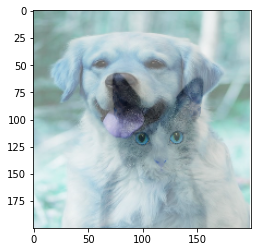

In [10]:
img_cat = cv2.imread('../example_images/cat.jpg')
img_dog = cv2.imread('../example_images/dog.jpg')

img_cat = cv2.resize(img_cat, (200, 200))
img_dog = cv2.resize(img_dog, (200, 200))

res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0) # z=a*x+b*y+c
plt.imshow(res)

## 3.7 图像阈值

ret, dst = cv2.threshold(src,thresh,maxval,type)
* src:输入图像,只能是单通道,一般为灰度图;
* dst:输出图;
* ret:输出的阈值
* thresh:阈值;
* maxval:当像素值超过阈值时,所赋予的值,根据type决定;
* type:二值化操作的类型,包含5种:cv2.THRESH_BINARY;cv2.THRESH_BINARY_INV;cv2.THRESH_TRUNC;cv2.THRESH_TOZERO;cv2.THRESH_TOZERO_INV
  * cv2.THRESH_BINARY:超过阈值部分取maxval,否则取0;
  * cv2.THRESH_BINARY_INV:上述的翻转(大于阈值的部分变为0,小于阈值的部分变为maxval);
  * cv2.THRESH_TRUNC:大于阈值的部分设置为阈值,否则不变;
  * cv2.THRESH_TOZERO:大于阈值部分不改变,否则设置为0;
  * cv2.THRESH_TOZERO_INV:上述的翻转

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

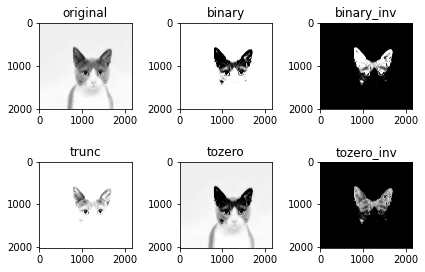

In [18]:
img = cv2.imread('../example_images/cat.jpg',cv2.IMREAD_GRAYSCALE)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['original', 'binary', 'binary_inv', 'trunc', 'tozero', 'tozero_inv']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], 'gray')
plt.tight_layout()
plt.show()

## 3.8 腐蚀和膨胀操作

腐蚀（Erosion）和膨胀（Dilation）是一对形态学操作，通常用于图像的预处理或后处理。腐蚀操作会对图像中的前景物体进行侵蚀，缩小前景物体的边界。这个操作会将图像中的边缘变细，并且去除小的噪声点。膨胀操作会扩大图像中的前景物体区域，增加前景物体的边界。这个操作可以用来连接断开的图像部分或填充小的黑色空洞。腐蚀和膨胀操作一般是针对灰度图像进行的。

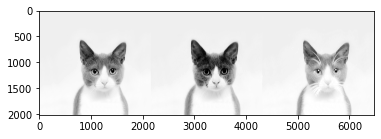

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../example_images/cat.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5, 5), np.uint8)
# 腐蚀操作
erosion = cv2.erode(img, kernel, iterations=3)

# 膨胀操作
dilate = cv2.dilate(img, kernel, iterations=3)

res = cv2.hconcat((img, erosion, dilate))
plt.imshow(res, 'gray')

## 3.9 开运算和闭运算

开运算是由腐蚀操作后跟膨胀操作组成的。开运算能够去除图像中的小型噪声并保持较大物体的结构。它可以平滑物体边界、断开连接的部分以及消除突出部分。闭运算是由膨胀操作后跟腐蚀操作组成的。闭运算能够填充物体内的小空洞、连接中断的部分，以及平滑物体边界。

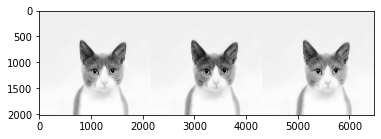

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../example_images/cat.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5),dtype=np.uint8)

# 开运算
open_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# 闭运算
close_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

res = cv2.hconcat((img, open_img, close_img))
plt.imshow(res, 'gray')

## 3.10 礼帽和黑帽

礼帽运算是通过对图像进行开运算后再与原始图像进行减法操作得到的结果。它可以帮助检测出比周围更明亮的小型细节和噪声。礼帽运算可以用来增强图像的局部对比度，并突出显示比较暗的区域。黑帽运算是通过对图像进行闭运算后再与原始图像进行减法操作得到的结果。它可以帮助检测比周围更暗的小型细节和噪声。黑帽运算可以用来增强图像的局部对比度，并突出显示比较明亮的区域。

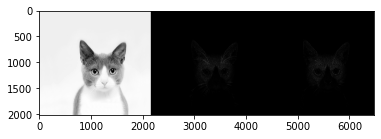

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../example_images/cat.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5),dtype=np.uint8)

# 礼帽
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# 黑帽
blackhat_img = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

res = cv2.hconcat((img, tophat_img, blackhat_img))
plt.imshow(res, 'gray')

## 3.11 图像导数

各种数学知识的计算：https://www.wolframalpha.com/ <br>
数学公式latex符号：https://latex-programming.fandom.com/wiki/List_of_LaTeX_symbols

数学中连续函数的导数公式为：$\frac{\partial f}{\partial x} = \lim_{\Delta h \to 0} \frac{f(x)-f(x-\Delta h)}{\Delta h}$ <br>
对于图像而言，由离散的像素点组成，最小的h取值为1，则图像的一阶导数可以表示为：
$\frac{\partial f}{\partial x} = f(x,y)-f(x-1,y)$ <br>
图像的一阶导数表示了图像亮度的变化率。

图像的二阶导数可以表示为：$\frac{\partial^2 f}{\partial x^2}=f^{\prime}(x,y)-f^{\prime}(x-1,y)=(f(x)-f(x-1))-(f(x-1)-f(x-2))$ <br>
化简可得：<br>
$\frac{\partial^2 f}{\partial x^2}=f(x,y)+f(x-2,y)-2f(x-1,y)$